In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [10]:
inspector = inspect(engine)

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Total dates (includes multiple date counts for different stations)
session.query(func.count(Measurement.date)).all()

[(19550)]

In [13]:
# show all dates
data = session.query(Measurement)
for info in data:
    print(info.date)


2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-03
2010-04-04
2010-04-05
2010-04-06
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-15

2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-05-31
2015-06-01
2015-06-02
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-07
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-13
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-28
2015-06-29
2015-06-30
2015-07-01
2015-07-02
2015-07-03
2015-07-04
2015-07-05
2015-07-06
2015-07-07
2015-07-08
2015-07-09
2015-07-10
2015-07-11
2015-07-12
2015-07-13
2015-07-14
2015-07-15
2015-07-16
2015-07-17
2015-07-18
2015-07-19
2015-07-20
2015-07-21
2015-07-22
2015-07-23
2015-07-24
2015-07-25
2015-07-26
2015-07-27
2015-07-28
2015-07-29
2015-07-30
2015-07-31
2015-08-01
2015-08-02
2015-08-03
2015-08-04
2015-08-05
2015-08-06
2015-08-07
2015-08-08
2015-08-09
2015-08-10
2015-08-11
2015-08-12
2015-08-13
2015-08-14
2015-08-15
2015-08-16
2015-08-17
2015-08-18
2015-08-19
2015-08-20
2015-08-21
2015-08-22
2015-08-23

2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-17
2011-12-18
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-24
2011-12-25
2011-12-26
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2011-12-31
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-07
2012-01-08
2012-01-09
2012-01-10
2012-01-11
2012-01-12
2012-01-13
2012-01-14
2012-01-15
2012-01-16
2012-01-17
2012-01-19
2012-01-20
2012-01-21
2012-01-22
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-28
2012-01-29
2012-01-30
2012-01-31
2012-02-01
2012-02-02
2012-02-03
2012-02-04
2012-02-05
2012-02-06
2012-02-07
2012-02-08
2012-02-09
2012-02-10
2012-02-11
2012-02-12
2012-02-13
2012-02-14
2012-02-15
2012-02-16
2012-02-17
2012-02-18
2012-02-19
2012-02-20
2012-02-21
2012-02-22
2012-02-23
2012-02-24
2012-02-25
2012-02-26
2012-02-27
2012-02-28
2012-02-29
2012-03-01
2012-03-02
2012-03-03

2016-02-21
2016-02-22
2016-02-23
2016-02-24
2016-02-25
2016-02-26
2016-02-27
2016-02-28
2016-02-29
2016-03-01
2016-03-02
2016-03-03
2016-03-04
2016-03-05
2016-03-06
2016-03-07
2016-03-08
2016-03-09
2016-03-10
2016-03-11
2016-03-12
2016-03-13
2016-03-14
2016-03-15
2016-03-16
2016-03-17
2016-03-18
2016-03-19
2016-03-20
2016-03-21
2016-03-22
2016-03-23
2016-03-24
2016-03-25
2016-03-26
2016-03-27
2016-03-28
2016-03-29
2016-03-30
2016-03-31
2016-04-01
2016-04-02
2016-04-03
2016-04-04
2016-04-05
2016-04-06
2016-04-07
2016-04-08
2016-04-09
2016-04-10
2016-04-11
2016-04-12
2016-04-13
2016-04-14
2016-04-15
2016-04-16
2016-04-17
2016-04-18
2016-04-19
2016-04-20
2016-04-21
2016-04-22
2016-04-23
2016-04-24
2016-04-25
2016-04-26
2016-04-27
2016-04-28
2016-04-29
2016-04-30
2016-05-01
2016-05-02
2016-05-03
2016-05-04
2016-05-05
2016-05-06
2016-05-07
2016-05-08
2016-05-09
2016-05-10
2016-05-11
2016-05-12
2016-05-13
2016-05-14
2016-05-15
2016-05-16
2016-05-17
2016-05-18
2016-05-19
2016-05-20
2016-05-21

2013-07-11
2013-07-12
2013-07-13
2013-07-14
2013-07-15
2013-07-16
2013-07-17
2013-07-18
2013-07-19
2013-07-20
2013-07-22
2013-07-23
2013-07-24
2013-07-25
2013-07-26
2013-07-27
2013-07-29
2013-07-30
2013-07-31
2013-08-19
2013-08-20
2013-08-21
2013-08-22
2013-08-23
2013-08-25
2013-08-26
2013-08-27
2013-08-28
2013-08-29
2013-08-30
2013-08-31
2013-09-02
2013-09-03
2013-09-04
2013-09-05
2013-09-06
2013-09-07
2013-09-09
2013-09-10
2013-09-11
2013-09-12
2013-09-13
2013-09-14
2013-09-16
2013-09-17
2013-09-18
2013-09-19
2013-09-20
2013-09-22
2013-09-23
2013-09-24
2013-09-25
2013-09-26
2013-09-27
2013-09-28
2013-09-30
2013-10-01
2013-10-02
2013-10-03
2013-10-04
2013-10-06
2013-10-07
2013-10-08
2013-10-09
2013-10-10
2013-10-11
2013-10-14
2013-10-15
2013-10-16
2013-10-17
2013-10-18
2013-10-19
2013-10-20
2013-10-21
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-26
2013-10-28
2013-10-29
2013-10-30
2013-10-31
2013-11-01
2013-11-04
2013-11-05
2013-11-06
2013-11-07
2013-11-08
2013-11-09
2013-11-10

2012-03-27
2012-03-28
2012-03-29
2012-03-30
2012-04-02
2012-04-03
2012-04-04
2012-04-05
2012-04-09
2012-04-10
2012-04-11
2012-04-12
2012-04-13
2012-04-16
2012-04-17
2012-04-18
2012-04-19
2012-04-20
2012-04-23
2012-04-24
2012-04-25
2012-04-26
2012-04-27
2012-05-02
2012-05-04
2012-05-07
2012-05-08
2012-05-09
2012-05-10
2012-05-11
2012-05-14
2012-05-15
2012-05-16
2012-05-17
2012-05-21
2012-05-22
2012-05-23
2012-05-24
2012-05-25
2012-05-29
2012-05-30
2012-05-31
2012-06-01
2012-06-04
2012-06-05
2012-06-06
2012-06-07
2012-06-08
2012-06-12
2012-06-13
2012-06-14
2012-06-15
2012-06-18
2012-06-19
2012-06-20
2012-06-21
2012-06-22
2012-06-25
2012-06-26
2012-06-27
2012-06-28
2012-06-29
2012-07-02
2012-07-03
2012-07-11
2012-07-12
2012-07-13
2012-07-16
2012-07-17
2012-07-18
2012-07-19
2012-07-20
2012-07-23
2012-07-24
2012-07-30
2012-07-31
2012-11-01
2012-11-02
2012-11-07
2012-11-08
2012-11-09
2012-11-13
2012-11-14
2012-11-15
2012-11-19
2012-11-20
2012-11-21
2012-11-26
2012-11-27
2012-11-28
2012-11-29

2012-07-22
2012-07-23
2012-07-24
2012-07-25
2012-07-30
2012-07-31
2012-08-01
2012-08-03
2012-08-06
2012-08-24
2012-09-14
2012-09-17
2012-09-21
2012-09-24
2012-10-05
2012-10-08
2012-10-10
2012-10-11
2012-10-12
2012-10-15
2012-10-16
2012-10-17
2012-10-18
2012-10-22
2012-11-01
2012-11-08
2012-11-13
2012-11-15
2012-11-16
2012-11-20
2012-11-26
2012-11-27
2012-12-03
2012-12-06
2013-01-10
2013-01-14
2013-01-23
2013-01-24
2013-01-25
2013-02-01
2013-02-02
2013-02-06
2013-02-07
2013-02-08
2013-02-14
2013-02-15
2013-02-20
2013-02-22
2013-02-25
2013-02-27
2013-04-03
2013-04-05
2013-04-08
2013-04-11
2013-04-15
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-12
2013-08-14
2013-08-19
2013-08-21
2013-08-22
2013-08-23
2013-08-27
2013-08-29
2013-08-30
2013-09-01
2013-09-05
2013-09-06
2013-09-10
2013-09-16
2013-09-19
2013-09-30
2013-10-18
2013-12-17
2013-12-19
2013-12-20
2013-12-23
2014-01-06
2014-01-08
2014-01-10
2014-01-13
2014-01-14
2014-02-03
2014-02-07
2014-02-12
2014-02-13
2014-02-16

2014-02-26
2014-02-27
2014-02-28
2014-03-01
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
2014-03-08
2014-03-09
2014-03-10
2014-03-11
2014-03-12
2014-03-13
2014-03-14
2014-03-15
2014-03-16
2014-03-17
2014-03-18
2014-03-19
2014-03-20
2014-03-21
2014-03-22
2014-03-23
2014-03-24
2014-03-25
2014-03-26
2014-03-27
2014-03-28
2014-03-29
2014-03-30
2014-03-31
2014-04-01
2014-04-02
2014-04-03
2014-04-04
2014-04-05
2014-04-06
2014-04-07
2014-04-08
2014-04-10
2014-04-11
2014-04-12
2014-04-13
2014-04-14
2014-04-15
2014-04-16
2014-04-17
2014-04-18
2014-04-19
2014-04-20
2014-04-21
2014-04-22
2014-04-24
2014-04-25
2014-04-26
2014-04-27
2014-04-28
2014-04-29
2014-05-01
2014-05-02
2014-05-03
2014-05-04
2014-05-06
2014-05-09
2014-05-10
2014-05-11
2014-05-12
2014-05-13
2014-05-14
2014-05-15
2014-05-16
2014-05-17
2014-05-18
2014-05-19
2014-05-20
2014-05-21
2014-05-22
2014-05-23
2014-05-24
2014-05-25
2014-05-26
2014-05-28
2014-05-29
2014-05-30
2014-05-31
2014-06-01
2014-06-02
2014-06-04
2014-06-05

2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-07
2011-07-08
2011-07-09
2011-07-10
2011-07-11
2011-07-12
2011-07-13
2011-07-14
2011-07-15
2011-07-16
2011-07-17
2011-07-18
2011-07-19
2011-07-20
2011-07-21
2011-07-22
2011-07-23
2011-07-24
2011-07-25
2011-07-26
2011-07-27
2011-07-28
2011-07-29
2011-07-30
2011-07-31
2011-08-01
2011-08-02
2011-08-03
2011-08-04
2011-08-05
2011-08-06
2011-08-07
2011-08-08
2011-08-09
2011-08-10
2011-08-11
2011-08-12
2011-08-13

2015-09-24
2015-09-25
2015-09-26
2015-09-27
2015-09-28
2015-09-29
2015-09-30
2015-10-01
2015-10-02
2015-10-03
2015-10-04
2015-10-05
2015-10-06
2015-10-07
2015-10-08
2015-10-09
2015-10-11
2015-10-12
2015-10-13
2015-10-14
2015-10-15
2015-10-16
2015-10-17
2015-10-18
2015-10-19
2015-10-20
2015-10-21
2015-10-22
2015-10-23
2015-10-24
2015-10-25
2015-10-26
2015-10-27
2015-10-28
2015-10-29
2015-10-30
2015-10-31
2015-11-01
2015-11-02
2015-11-03
2015-11-04
2015-11-05
2015-11-06
2015-11-07
2015-11-08
2015-11-09
2015-11-10
2015-11-11
2015-11-12
2015-11-13
2015-11-14
2015-11-15
2015-11-16
2015-11-17
2015-11-18
2015-11-19
2015-11-20
2015-11-21
2015-11-22
2015-11-23
2015-11-24
2015-11-25
2015-11-26
2015-11-27
2015-11-28
2015-11-29
2015-11-30
2015-12-01
2015-12-02
2015-12-03
2015-12-04
2015-12-05
2015-12-06
2015-12-07
2015-12-08
2015-12-09
2015-12-10
2015-12-11
2015-12-12
2015-12-13
2015-12-14
2015-12-15
2015-12-16
2015-12-17
2015-12-18
2015-12-19
2015-12-20
2015-12-21
2015-12-22
2015-12-23
2015-12-24

2012-07-13
2012-07-14
2012-07-15
2012-07-16
2012-07-17
2012-07-18
2012-07-19
2012-07-20
2012-07-21
2012-07-22
2012-07-23
2012-07-24
2012-07-25
2012-07-26
2012-07-27
2012-07-28
2012-07-29
2012-07-30
2012-07-31
2012-08-01
2012-08-02
2012-08-03
2012-08-04
2012-08-05
2012-08-06
2012-08-07
2012-08-08
2012-08-09
2012-08-10
2012-08-11
2012-08-12
2012-08-13
2012-08-14
2012-08-15
2012-08-16
2012-08-17
2012-08-18
2012-08-19
2012-08-20
2012-08-21
2012-08-22
2012-08-23
2012-08-24
2012-08-25
2012-08-26
2012-08-27
2012-08-28
2012-08-29
2012-08-30
2012-08-31
2012-09-01
2012-09-02
2012-09-03
2012-09-04
2012-09-05
2012-09-06
2012-09-07
2012-09-08
2012-09-09
2012-09-10
2012-09-11
2012-09-12
2012-09-13
2012-09-14
2012-09-15
2012-09-16
2012-09-17
2012-09-18
2012-09-19
2012-09-20
2012-09-21
2012-09-22
2012-09-23
2012-09-24
2012-09-25
2012-09-26
2012-09-27
2012-09-28
2012-09-29
2012-09-30
2012-10-01
2012-10-02
2012-10-03
2012-10-04
2012-10-05
2012-10-06
2012-10-07
2012-10-08
2012-10-09
2012-10-10
2012-10-11

2011-04-27
2011-04-28
2011-04-29
2011-05-01
2011-05-02
2011-05-03
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22
2011-06-23
2011-06-24
2011-06-25
2011-06-26
2011-06-27
2011-06-28
2011-06-29
2011-06-30
2011-07-01
2011-07-02
2011-07-03
2011-07-04
2011-07-05
2011-07-06
2011-07-08
2011-07-10
2011-07-11
2011-07-13
2011-07-14
2011-07-15
2011-07-16
2011-07-17
2011-07-18
2011-07-19
2011-07-20
2011-07-21
2011-07-22
2011-07-23
2011-07-24
2011-07-25
2011-07-26
2011-07-27
2011-07-28
2011-07-29
2011-07-31
2011-08-01

2015-09-29
2015-09-30
2015-10-01
2015-10-02
2015-10-03
2015-10-04
2015-10-05
2015-10-06
2015-10-07
2015-10-08
2015-10-09
2015-10-10
2015-10-12
2015-10-13
2015-10-14
2015-10-15
2015-10-16
2015-10-17
2015-10-20
2015-10-21
2015-10-22
2015-10-23
2015-10-24
2015-10-25
2015-10-26
2015-10-27
2015-10-28
2015-10-29
2015-10-30
2015-10-31
2015-11-01
2015-11-03
2015-11-04
2015-11-05
2015-11-06
2015-11-07
2015-11-08
2015-11-09
2015-11-10
2015-11-11
2015-11-12
2015-11-13
2015-11-14
2015-11-15
2015-11-17
2015-11-18
2015-11-19
2015-11-20
2015-11-21
2015-11-22
2015-11-23
2015-11-24
2015-11-25
2015-11-26
2015-11-27
2015-11-28
2015-11-29
2015-11-30
2015-12-01
2015-12-02
2015-12-03
2015-12-04
2015-12-05
2015-12-06
2015-12-07
2015-12-08
2015-12-09
2015-12-10
2015-12-11
2015-12-12
2015-12-13
2015-12-15
2015-12-16
2015-12-17
2015-12-18
2015-12-19
2015-12-20
2015-12-22
2015-12-23
2015-12-24
2015-12-25
2015-12-26
2015-12-27
2015-12-29
2015-12-30
2015-12-31
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-05

In [14]:
#find the most recent date (advanved SQL day 3, dates activity)
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [15]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('One year from last date: ', query_date)

One year from last date:  2016-08-23


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#sqlalcnehmy day 3, student date activity and student dates (DOW activity)

precip = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
    filter(Measurement.date> query_date).\
    order_by(Measurement.date).all()
precip

[('USC00519397', '2016-08-24', 0.08),
 ('USC00513117', '2016-08-24', 2.15),
 ('USC00514830', '2016-08-24', 2.28),
 ('USC00517948', '2016-08-24', None),
 ('USC00519523', '2016-08-24', 1.22),
 ('USC00519281', '2016-08-24', 2.15),
 ('USC00516128', '2016-08-24', 1.45),
 ('USC00519397', '2016-08-25', 0.08),
 ('USC00513117', '2016-08-25', 0.08),
 ('USC00514830', '2016-08-25', 0.0),
 ('USC00517948', '2016-08-25', 0.0),
 ('USC00519523', '2016-08-25', 0.21),
 ('USC00519281', '2016-08-25', 0.06),
 ('USC00516128', '2016-08-25', 0.11),
 ('USC00519397', '2016-08-26', 0.0),
 ('USC00513117', '2016-08-26', 0.03),
 ('USC00514830', '2016-08-26', 0.02),
 ('USC00517948', '2016-08-26', 0.04),
 ('USC00519523', '2016-08-26', 0.0),
 ('USC00519281', '2016-08-26', 0.01),
 ('USC00519397', '2016-08-27', 0.0),
 ('USC00513117', '2016-08-27', 0.18),
 ('USC00514830', '2016-08-27', 0.02),
 ('USC00519523', '2016-08-27', 0.0),
 ('USC00519281', '2016-08-27', 0.12),
 ('USC00516128', '2016-08-27', None),
 ('USC00519397', '

In [17]:
#upack tuples (advanced SQL day 2, emoji activity)
# base_id = [result[0] for result in precip[::]]
date = [result[1] for result in precip[::]]
prcp = [result[2] for result in precip[::]]

# print(base_id)
# print(date)
# print(prcp)


In [18]:
#pandas lession, day: 1, activity: student training grounds
#need to set the index to date
#how to set index: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
precip_df = pd.DataFrame({"Date":date, "Prcp":prcp}).set_index('Date')
precip_df.head(40)

,Prcp
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [20]:
precip_df.plot.bar(x='Date', y='Prcp', rot=0)

KeyError: 'Date'

In [21]:
#this does not work at all (plots a chart, but no data showing)
# precip_plot = pd.DataFrame(precip_df, columns = ['date', 'prcp'])
# precip_plot.set_index('date', inplace = True)
# precip_plot.plot.bar()
# plt.tight_layout()
# plt.show()

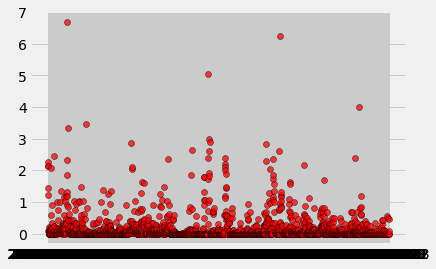

In [22]:
#this works as a scatter plot (shows all dates which is too many)
plt.scatter(date, prcp, marker="o", facecolors="red", edgecolors="black",alpha=0.75)

In [23]:
#this does not work at all (doesnt produce a graph)
# plt.figure(figsize=(20,3))
# plt.bar(date, prcp, color='r', alpha=0.5, align="edge")
# plt.xticks(tick_locations, prcp, rotation="vertical")

In [24]:
#this does not work at all (doesnt produce a graph)
# plt.bar(date, prcp, color='r', alpha=0.5, align="center")

In [25]:
#this does not work at all (doesnt produce a graph)
# plot = pd.DataFrame(prcp, columns = ['station','date', 'prcp'])
# plot.set_index('date', inplace = True)
# plot.plot.bar()
# # plt.tight_layout()
# plt.show()

In [26]:
#this does not work at all (doesnt produce a graph)
# fig, ax = plt.subplots()
# ypos = range(1, len(scores)+1)
# ax.barh(ypos, scores[::-1])
# ax.set_xlabel("score")
# ax.set_ylabel("emoji")
# ax.set_yticks(ypos)
# ax.set_yticklabels(emoji_id[::-1])
# ax.set_title("Emoji Scores")
# fig.tight_layout()
# plt.show()

In [27]:
# precip_count = session.query(Measurement.prcp).\
#     filter(Measurement.date> '2016-08-23').\
#     order_by(Measurement.date).all()
# precip_count

In [28]:
#this plots a graph, but x-axis is messed up
# plot = pd.DataFrame(precip, columns = ['station','date', 'prcp'])
# plot.set_index('date', inplace = True)
# plot.plot.bar()
# # plt.tight_layout()
# plt.show()

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#sqlalcnehmy day 3, student date activity and student dates (DOW activity)

# precip2 = session.query(Measurement.station, Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).limit(1000).all()
# precip2

In [30]:
#this plots a graph, but x-axis is messed up

# plot = pd.DataFrame(precip2, columns = ['station','date', 'prcp'])
# plot.set_index('date', inplace = True)
# plot.plot.bar()
# # plt.tight_layout()
# plt.show()

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
precip_df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(Stations.station)).all()
print(f'There are {station_count} stations')

There are [(9,)] stations


In [43]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
x = session.query(Measurement, func.count(Measurement.station)).\
    group_by(Measurement.station)
x

In [ ]:
data = session.query(Measurement)
for info in data:
    print(info.date)

In [44]:
station_count = session.query(Measurement).\
    filter(Measurement.station == "USC00519397").count()
print(station_count)

2724


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()